<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [37]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-11-18 00:04:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.002s  

2020-11-18 00:04:39 (11.1 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [75]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [76]:
df.shape

(346, 10)

In [77]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB
None


### Convert to date time object 

In [78]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [79]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [8]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    argon2-cffi-20.1.0         |   py37h7b6447c_1          49 KB  anaconda
    defusedxml-0.6.0           |             py_0          23 KB  anaconda
    entrypoints-0.3            |           py37_0          12 KB  anaconda
    fontconfig-2.13.0          |       h9420a91_0         291 KB  anaconda
    icu-58.2                   |       he6710b0_3        22.7 MB  anaconda
    ipython_genutils-0.2.0     |           py37_0         

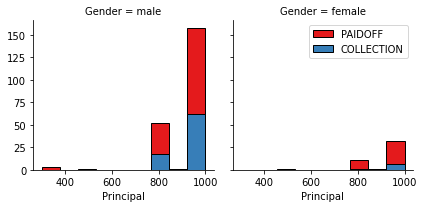

In [80]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

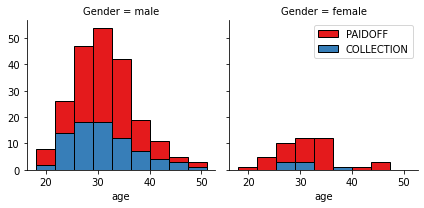

In [81]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

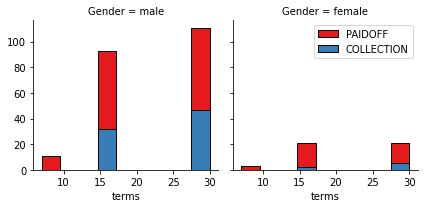

In [82]:
bins = np.linspace(df.terms.min(), df.terms.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'terms', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [83]:
df['terms'].value_counts()

30    184
15    148
7      14
Name: terms, dtype: int64

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

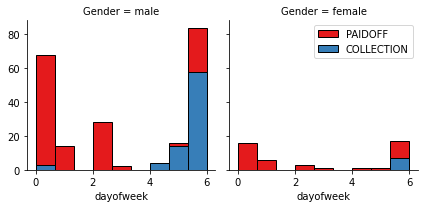

In [84]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [85]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [86]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [87]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [88]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [89]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [90]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [91]:
#To examine Decission Tree - no Weekend
FeatureDT = Feature.drop('weekend', 1)
FeatureDT.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


In [92]:
#Coding in the same column to examine Decission Tree 2
FeatureDT2 = df[['Principal','terms','age','Gender', 'education', 'weekend']]
education_rating = {"High School or Below":1, "Bechalor":2, "college":3, "Master or Above":4 }
FeatureDT2['education']= FeatureDT2.education.map(education_rating)
FeatureDT2.head()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Principal,terms,age,Gender,education,weekend
0,1000,30,45,0,1,0
1,1000,30,33,1,2,0
2,1000,15,27,0,3,0
3,1000,30,28,1,3,1
4,1000,30,29,0,3,1


In [93]:
print(Feature.info())
print(FeatureDT.info())
print(FeatureDT2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal             346 non-null    int64
 1   terms                 346 non-null    int64
 2   age                   346 non-null    int64
 3   Gender                346 non-null    int64
 4   weekend               346 non-null    int64
 5   Bechalor              346 non-null    uint8
 6   High School or Below  346 non-null    uint8
 7   college               346 non-null    uint8
dtypes: int64(5), uint8(3)
memory usage: 14.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal             346 non-null    int64
 1   terms                 346 non-null    int64
 2   age                   346 non-null    int64
 3 

In [94]:
FeatureSVM = Feature[:]
FeatureSVM["Bechalor"]=FeatureSVM["Bechalor"].astype("int")
FeatureSVM["High School or Below"]=FeatureSVM["High School or Below"].astype("int")
FeatureSVM["college"]=FeatureSVM["college"].astype("int")
FeatureSVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal             346 non-null    int64
 1   terms                 346 non-null    int64
 2   age                   346 non-null    int64
 3   Gender                346 non-null    int64
 4   weekend               346 non-null    int64
 5   Bechalor              346 non-null    int64
 6   High School or Below  346 non-null    int64
 7   college               346 non-null    int64
dtypes: int64(8)
memory usage: 21.8 KB


In [95]:
print(Feature.info())
print(FeatureDT.info())
print(FeatureDT2.info())
print(FeatureSVM.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal             346 non-null    int64
 1   terms                 346 non-null    int64
 2   age                   346 non-null    int64
 3   Gender                346 non-null    int64
 4   weekend               346 non-null    int64
 5   Bechalor              346 non-null    uint8
 6   High School or Below  346 non-null    uint8
 7   college               346 non-null    uint8
dtypes: int64(5), uint8(3)
memory usage: 14.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal             346 non-null    int64
 1   terms                 346 non-null    int64
 2   age                   346 non-null    int64
 3 

### Feature selection

Lets defind feature sets, X:

In [96]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [97]:
XDT = FeatureDT #For Decision Tree without "weekend"
XDT[0:5]

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


In [98]:
XDT2 = FeatureDT2 #For Decision Tree - education coded in the same column
XDT2[0:5]

,Principal,terms,age,Gender,education,weekend
0,1000,30,45,0,1,0
1,1000,30,33,1,2,0
2,1000,15,27,0,3,0
3,1000,30,28,1,3,1
4,1000,30,29,0,3,1


In [99]:
XSVM = FeatureSVM
XSVM[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [100]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


What are our lables?

In [101]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [103]:
FeatureLog = df.copy()
FeatureLog
FeatureLog['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0], inplace=True)
FeatureLog[0:5]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [105]:
#Target for log_Reg (int)
y2 = FeatureLog['loan_status'].values
y2[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [106]:
X2= preprocessing.StandardScaler().fit(X).transform(X)
X2[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [109]:
#Import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

In [107]:
#Train Test split with normalized data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [110]:
#The best K with the best accuracy
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

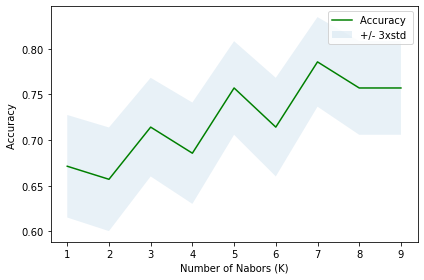

In [111]:
#Plot model accuracy for different Ks
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [112]:
#The Best K
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 7


In [113]:
#Train
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [114]:
#Predict
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [116]:
#Accuracy evaluation
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat)) #as Jaccard_Similarity
print("F1_score :", f1_score(y_test, yhat, average='weighted') )
print("Jaccard_score :", jaccard_score(y_test, yhat, pos_label="PAIDOFF"))

Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.7857142857142857
F1_score : 0.7766540244416351
Jaccard_score : 0.765625


# Decision Tree

In [117]:
#libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [118]:
#train - test split with not normalized data
X_traindt, X_testdt, y_traindt, y_testdt = train_test_split(XDT2, y, test_size=0.3, random_state=4)
print ('Train set:', X_traindt.shape,  y_traindt.shape)
print ('Test set:', X_testdt.shape,  y_testdt.shape)

Train set: (242, 6) (242,)
Test set: (104, 6) (104,)


In [119]:
#Train
trainTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5, min_samples_split = 2)
trainTree
#Fit
trainTree.fit(X_traindt, y_traindt)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [120]:
#Predict
predTree = trainTree.predict(X_testdt)
predTree [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [122]:
#Accuracy evaluation
print("DecisionTrees's Accuracy-traintest: ", metrics.accuracy_score(y_traindt, trainTree.predict(X_traindt)))
print("DecisionTrees's Accuracy-testset: ", metrics.accuracy_score(y_testdt, predTree)) #as Jaccard_Similarity
print("F1_score :", f1_score(y_testdt, predTree, average='weighted') )
print("Jaccard_score :", jaccard_score(y_testdt, predTree, pos_label="PAIDOFF"))

DecisionTrees's Accuracy-traintest:  0.7644628099173554
DecisionTrees's Accuracy-testset:  0.7403846153846154
F1_score : 0.6299405014874628
Jaccard_score : 0.7403846153846154


In [58]:
#Conda does not work:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [123]:
!pip install six

In [124]:
!pip install pydotplus #conda did not work, this code does.

In [125]:
!pip install graphviz #conda did not work, this code does.

In [126]:
#from sklearn.externals.six import StringIO
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

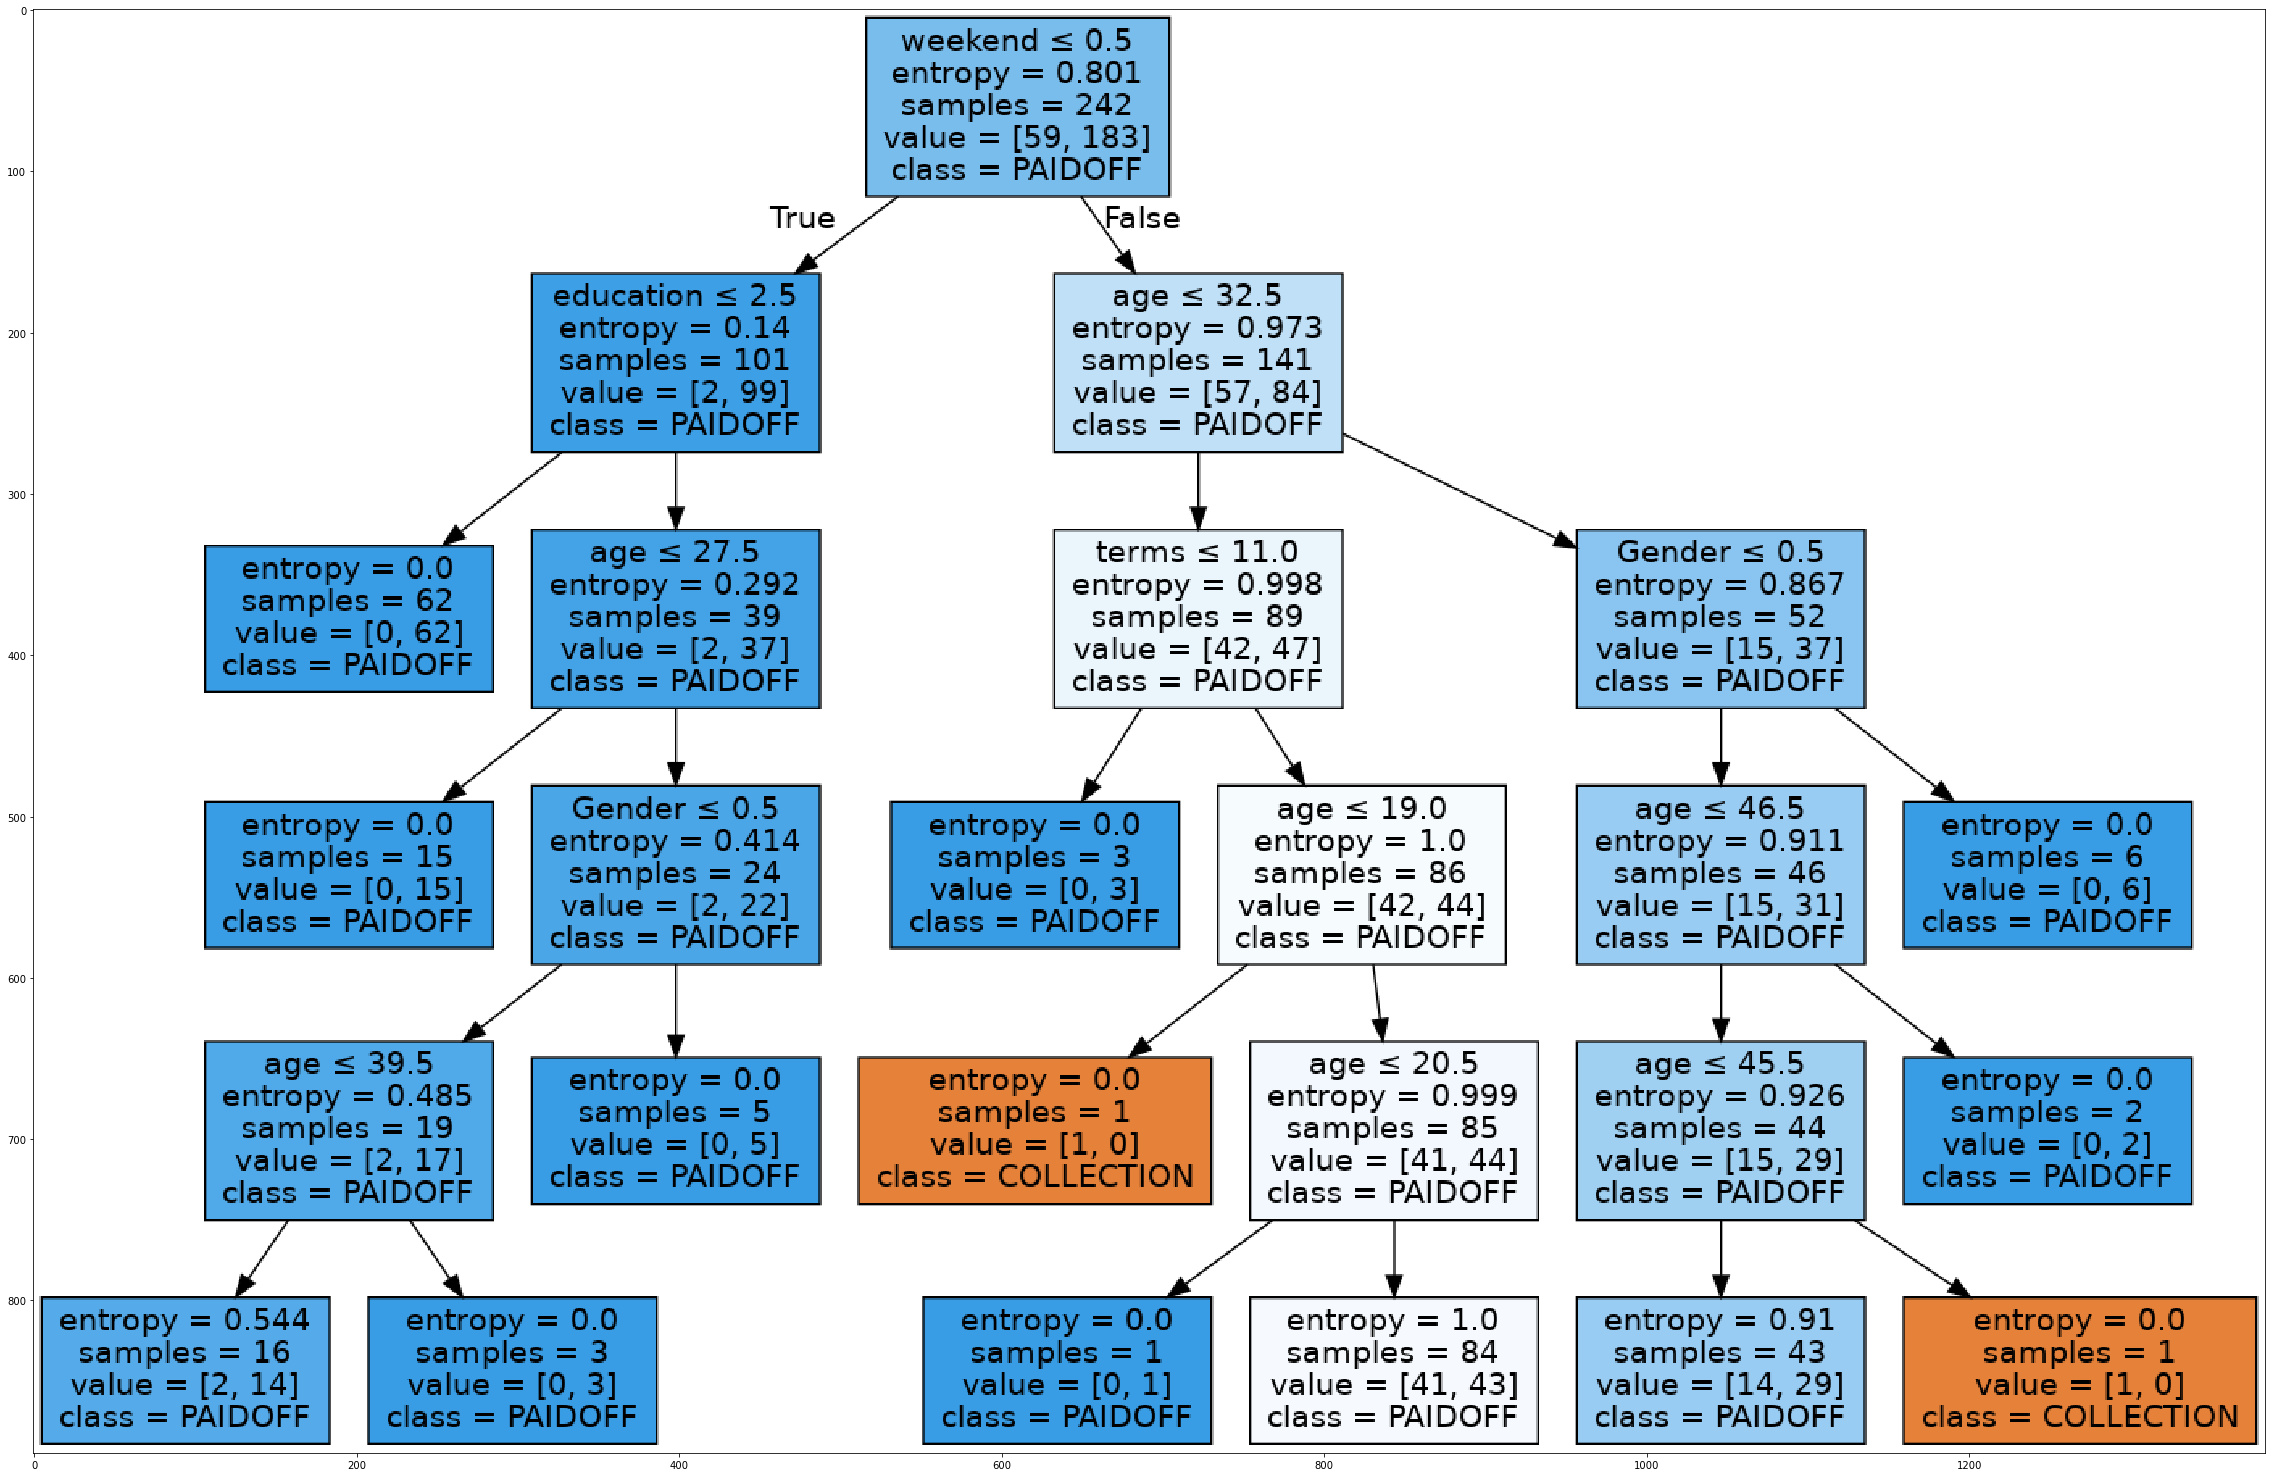

In [128]:
#Visualization
dot_data = StringIO()
filename = "paidoff.png"
featureNames = FeatureDT2.columns[0:6]
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(trainTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_traindt), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(40, 100))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [129]:
#libraries
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [130]:
#train - test split with not normalized dataTrain
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split(XSVM, y, test_size=0.3, random_state=2)
print ('Train set:', X_trainsvm.shape,  y_trainsvm.shape)
print ('Test set:', X_testsvm.shape,  y_testsvm.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [131]:
#Train-modeling
pc = svm.SVC(kernel='rbf')
pc.fit(X_trainsvm, y_trainsvm)

SVC()

In [132]:
#Predict
predsvm = pc.predict(X_testsvm) #yhat
predsvm [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [133]:
#Accuracy evaluation (as Jaccard_Similarity)
print("F1_score :", f1_score(y_testsvm, predsvm, average='weighted') )
print("Jaccard_score :", jaccard_score(y_testsvm, predsvm, pos_label='PAIDOFF'))

F1_score : 0.682016632016632
Jaccard_score : 0.7788461538461539


In [134]:
#Additional - Confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        23
     PAIDOFF       0.78      1.00      0.88        81

    accuracy                           0.78       104
   macro avg       0.39      0.50      0.44       104
weighted avg       0.61      0.78      0.68       104

Confusion matrix, without normalization
[[81  0]
 [23  0]]


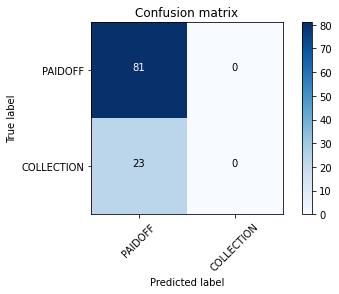

In [135]:
#Display Confusion matrix
cnf_matrix = confusion_matrix(y_testsvm, predsvm, labels=["PAIDOFF","COLLECTION"])
np.set_printoptions(precision=2)

print (classification_report(y_testsvm, predsvm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

# Logistic Regression

In [136]:
#Libraries
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [137]:
#train - test split with not normalized dataTrain
X_trainlog, X_testlog, y_trainlog, y_testlog = train_test_split( X2, y2, test_size=0.3, random_state=2)
print ('Train set:', X_trainlog.shape,  y_trainlog.shape)
print ('Test set:', X_testlog.shape,  y_testlog.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [138]:
#Train-modeling
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainlog,y_trainlog)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [139]:
#Predict
predlog = LR.predict(X_testlog)
predlog[0:5]

array([1, 1, 1, 1, 1])

In [140]:
#Predict prob
predlog_prob = LR.predict_proba(X_testlog)
predlog_prob[0:5]

array([[0.45, 0.55],
       [0.43, 0.57],
       [0.47, 0.53],
       [0.5 , 0.5 ],
       [0.36, 0.64]])

In [141]:
#Accuracy evaluation (as Jaccard_Similarity)
print("F1_score :", f1_score(y_testlog, predlog, average='weighted') )
print("Jaccard_score :", jaccard_score(y_testlog, predlog, pos_label=1))
print("Log loss :","%.2f" % log_loss(y_testlog, predlog_prob))

F1_score : 0.7052556818181818
Jaccard_score : 0.7425742574257426
Log loss : 0.57


              precision    recall  f1-score   support

           0       0.33      0.13      0.19        23
           1       0.79      0.93      0.85        81

    accuracy                           0.75       104
   macro avg       0.56      0.53      0.52       104
weighted avg       0.69      0.75      0.71       104

Confusion matrix, without normalization
[[75  6]
 [20  3]]


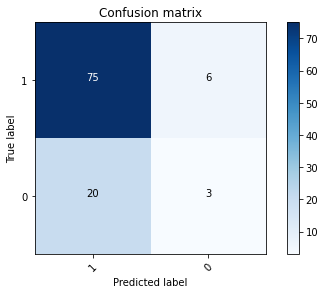

In [142]:
#Display Confusion matrix
cnf_matrix = confusion_matrix(y_testlog, predlog, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_testlog, predlog))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,0],normalize= False,  title='Confusion matrix')

# Model Evaluation using Test set

In [143]:
from sklearn.metrics import jaccard_score #from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [144]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-11-18 00:40:42--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-11-18 00:40:43 (81.8 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [153]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [154]:
#Preprocessing
test_df ['due_date'] = pd.to_datetime(test_df ['due_date'])
test_df ['effective_date'] = pd.to_datetime(test_df ['effective_date'])
test_df ['dayofweek'] = test_df ['effective_date'].dt.dayofweek
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df .head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6


In [155]:
#Preprocessing
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [156]:
#Features
FeatureLT = test_df[['Principal','terms','age','Gender','weekend']]
FeatureLT = pd.concat([FeatureLT,pd.get_dummies(test_df['education'])], axis=1)
FeatureLT.drop(['Master or Above'], axis = 1,inplace=True)
FeatureLT.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [157]:
#To examine Decission Tree - no Weekend
FeatureLTDT = FeatureLT.drop('weekend', 1)
FeatureLTDT.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,50,1,1,0,0
1,300,7,35,0,0,0,0
2,1000,30,43,1,0,1,0
3,1000,30,26,0,0,0,1
4,800,15,29,0,1,0,0


In [158]:
#Coding in the same column to examine Decission Tree 2
FeatureLTDT2 = test_df[['Principal','terms','age','Gender', 'education', 'weekend']]
education_rating = {"High School or Below":1, "Bechalor":2, "college":3, "Master or Above":4 }
FeatureLTDT2['education']= FeatureLTDT2.education.map(education_rating)
FeatureLTDT2.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Principal,terms,age,Gender,education,weekend
0,1000,30,50,1,2,0
1,300,7,35,0,4,1
2,1000,30,43,1,1,1
3,1000,30,26,0,3,1
4,800,15,29,0,2,1


In [160]:
FeatureLTSVM = FeatureLT.copy()
FeatureLTSVM["Bechalor"]=FeatureLTSVM["Bechalor"].astype("int")
FeatureLTSVM["High School or Below"]=FeatureLTSVM["High School or Below"].astype("int")
FeatureLTSVM["college"]=FeatureLTSVM["college"].astype("int")
FeatureLTSVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal             54 non-null     int64
 1   terms                 54 non-null     int64
 2   age                   54 non-null     int64
 3   Gender                54 non-null     int64
 4   weekend               54 non-null     int64
 5   Bechalor              54 non-null     int64
 6   High School or Below  54 non-null     int64
 7   college               54 non-null     int64
dtypes: int64(8)
memory usage: 3.5 KB


In [171]:
FeatureLogLT = test_df.copy()
FeatureLogLT
FeatureLogLT['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0], inplace=True)
FeatureLogLT[0:5]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,1,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,1,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [164]:
#Feature selection
XLT = FeatureLT
XLT[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [165]:
#Feature selection - normalized
XLT2= preprocessing.StandardScaler().fit(XLT).transform(XLT)
XLT2[0:5]

array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.86]])

In [166]:
#Feature selection DTree
XLTDT2 = FeatureLTDT2 #For Decision Tree - education coded in the same column
XLTDT2[0:5]

,Principal,terms,age,Gender,education,weekend
0,1000,30,50,1,2,0
1,300,7,35,0,4,1
2,1000,30,43,1,1,1
3,1000,30,26,0,3,1
4,800,15,29,0,2,1


In [167]:
#Feature selection SVM
XLTSVM = FeatureLTSVM
XLTSVM[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [174]:
#Targets of Load Data
yLD = test_df['loan_status'].values # original data
print(yLD[0:5])

y2LD = FeatureLogLT['loan_status'].values # coded data
print(y2LD[0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
[1 1 1 1 1]


In [178]:
#Predictions with Load Test Data
yhatLT = neigh.predict(XLT2) # normalized - KNN model
predTreeLT = trainTree.predict(XLTDT2) # Decision Tree model
predsvmLT = pc.predict(XLTSVM) # SVM model
predlogLT = LR.predict(XLT2) # normalized - Log REG model
predlogLT_prob = LR.predict_proba(XLT2) #for predicting log.Reg probabilities

In [179]:
#Validations
print("F1_score KNN :", f1_score(yLD, yhatLT, average='weighted') )
print("Jaccard_score KNN :", jaccard_score(yLD, yhatLT, pos_label="PAIDOFF"))

print("F1_score D.TREE :", f1_score(yLD, predTreeLT, average='weighted') )
print("Jaccard_score D.TREE :", jaccard_score(yLD, predTreeLT, pos_label="PAIDOFF"))

print("F1_score SVM :", f1_score(yLD, predsvmLT, average='weighted') )
print("Jaccard_score SVM :", jaccard_score(yLD, predsvmLT, pos_label="PAIDOFF"))

print("F1_score LOG.REG :", f1_score(y2LD, predlogLT, average='weighted') )
print("Jaccard_score LOG.REG :", jaccard_score(y2LD, predlogLT, pos_label=1))
print("Log loss LOG.REG :","%.2f" % log_loss(y2LD, predlogLT_prob))

F1_score KNN : 0.6328400281888654
Jaccard_score KNN : 0.6538461538461539
F1_score D.TREE : 0.6304176516942475
Jaccard_score D.TREE : 0.7407407407407407
F1_score SVM : 0.6304176516942475
Jaccard_score SVM : 0.7407407407407407
F1_score LOG.REG : 0.6604267310789049
Jaccard_score LOG.REG : 0.7358490566037735
Log loss LOG.REG : 0.58


In [218]:
results = {"Algorithm":["KNN", "Decision Tree", "SVM", "LogisticRegression"], "Jaccard":[jaccard_score(yLD, yhatLT, pos_label="PAIDOFF"),jaccard_score(yLD, predTreeLT, pos_label="PAIDOFF"),jaccard_score(yLD, predsvmLT, pos_label="PAIDOFF"),jaccard_score(y2LD, predlogLT, pos_label=1)], 
           "F1-score":[f1_score(yLD, yhatLT, average='weighted'), f1_score(yLD, predTreeLT, average='weighted'), f1_score(yLD, predsvmLT, average='weighted'), f1_score(y2LD, predlogLT, average='weighted')], 
           "LogLoss":["NA", "NA", "NA", "%.2f" % log_loss(y2LD, predlogLT_prob)]}
resultsDF = pd.DataFrame(results)
resultsDF

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.653846,0.632840,NA
1,Decision Tree,0.740741,0.630418,NA
2,SVM,0.740741,0.630418,NA
3,LogisticRegression,0.735849,0.660427,0.58


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>